This notebook offers a practical exploration, implementation and evaluation of a Linear Regression and a Decision Tree model both applied on the same. This notebook has a four-fold objective:
<ol>
    <li>Cover the scopes of the 4th Assignment where we aim to examine/evaluate Linear Regression models, along with their hyperparameter tuning and regularization techniques.
        <ul>
            <li>
                <b>ACTION POINT FOR STUDENTS:</b> Write your own code and proceed with the implementation of the different tasks allocated in the Linear Regression models.
            </li>
          </ul>
        </li>
   <li>Cover the scopes of the 4th Lab dedicated to the Decision Trees. 
       <ul>
            <li>
                <b>ACTION POINT FOR STUDENTS:</b> Please read careful the instructions and be prepared for our next Lab Session. State questions and items to be discussed.
            </li>
          </ul>
    </li>
   <li>Perform an evaluation and comparison of different techniques that can be used in the context of a Regression problem</li>
   <li>Acts as a continum and link between the <b>Regression and Decision Trees lectures</b></li>
</ol>

Through this approach the following points will be addressed:

<ul><li>How to shape, visualize and clean the data perforfming initial Exploratory Data Analysis (EDA) and Future Engineering</li>
<li>How to build and train the models (or predictors)</li>
<li>How to evaluate and finetune their performance</li></ul>

## Problem Statement

The company you are working for has now assigned you to a different project. A new collaboration with the UEFA has revealed a potential for examining the rating of the football players that participate in the european champions. The <b>Fifa Players</b> Dataset (https://tilburguniversity.instructure.com/courses/14287/files/folder/Assignments?preview=3010033) contains 5000 records/instances for different football players and information related to their characteristics (right/left foot, defence pace etc.) and level of professional in different categories, such as passing, heading etc. The goal is to predict their overall rating (depedent variable) based on the different characteristics and grade that they have in the different categories. <u><i>Note:</i></u> It should be noted that we do not examine the evolution of a player over time.

In [1]:
# Import necessary libraries
# General imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.tree import DecisionTreeRegressor 
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import seaborn as sns # Plotting library, install with 'pip install seaborn'

In [2]:
# Place your code to read the csv file and store it into a dataframe by using the pandas read_csv command
data = pd.read_csv('./fifa_players.csv')
# visualize the data
data.head(10)

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2/18/2016 0:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,11/19/2015 0:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,9/21/2015 0:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,3/20/2015 0:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2/22/2007 0:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
5,6,189615,155782,4/21/2016 0:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
6,7,189615,155782,4/7/2016 0:00,74.0,76.0,left,high,medium,80.0,...,66.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
7,8,189615,155782,1/7/2016 0:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
8,9,189615,155782,12/24/2015 0:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0
9,10,189615,155782,12/17/2015 0:00,73.0,75.0,left,high,medium,79.0,...,65.0,59.0,76.0,75.0,78.0,14.0,7.0,9.0,9.0,12.0


# 4th Assignment (Regression Models)

### Task 1: Exploratory Data Analysis (EDA)

In [3]:
# Let us get a brief overview of what this data contains by implementing code to describe the data.
# Place your code

data.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,5000.000000,5000.000000,5000.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000,4935.000000,...,4935.000000,4987.000000,4987.000000,4987.000000,4935.000000,4987.000000,4987.000000,4987.000000,4987.000000,4987.000000
mean,2500.500000,170690.197000,153016.880000,67.809304,73.160016,54.923000,51.372769,56.840586,62.106276,50.179331,...,57.845593,55.410868,45.081412,48.585723,45.934954,13.436535,15.109084,18.998797,15.180870,15.258472
std,1443.520003,51407.530297,148693.659208,7.227183,6.763234,16.785715,18.730240,15.749673,14.133040,17.760319,...,15.120422,15.448848,20.206956,20.680521,20.827715,14.702946,14.100939,19.430015,14.324521,15.234797
min,1.000000,1323.000000,3264.000000,42.000000,52.000000,6.000000,3.000000,4.000000,8.000000,5.000000,...,2.000000,7.000000,5.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,2.000000
25%,1250.750000,163901.000000,37422.000000,63.000000,68.000000,44.000000,35.000000,49.000000,57.000000,35.000000,...,48.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,7.000000,8.000000,8.000000
50%,2500.500000,186561.000000,102572.000000,68.000000,73.000000,58.000000,55.000000,59.000000,65.000000,53.000000,...,60.000000,57.000000,47.000000,53.000000,47.000000,10.000000,12.000000,11.000000,11.000000,11.000000
75%,3750.250000,202153.000000,210400.000000,73.000000,78.000000,67.000000,67.000000,67.000000,71.000000,65.000000,...,69.000000,67.000000,64.000000,67.000000,65.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,5000.000000,233642.000000,715642.000000,89.000000,91.000000,92.000000,93.000000,92.000000,89.000000,84.000000,...,87.000000,94.000000,85.000000,88.000000,85.000000,80.000000,82.000000,86.000000,82.000000,86.000000


In [4]:
# Data Exploration
# Display basic information about the dataset, such as column names, data types, and missing values.
print("Dataset Information:")
# Place your code

print(f'column names :{list(data)}')
print('*'*50)
print('data types')
print(data.dtypes)

Dataset Information:
column names :['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']
**************************************************
data types
id                       int64
player_fifa_api_id       int64
player_api_id            int64
date                    object
overall_rating         float64
potential              float64
preferred_foot          object
attacking_work_rate     object
defensive_work_rate     object
cross

In [5]:
# Check for missing values
# Place your code

print('missing values')
print(data.isnull().sum())

missing values
id                       0
player_fifa_api_id       0
player_api_id            0
date                     0
overall_rating          13
potential               13
preferred_foot          13
attacking_work_rate    159
defensive_work_rate     13
crossing                13
finishing               13
heading_accuracy        13
short_passing           13
volleys                 65
dribbling               13
curve                   65
free_kick_accuracy      13
long_passing            13
ball_control            13
acceleration            13
sprint_speed            13
agility                 65
reactions               13
balance                 65
shot_power              13
jumping                 65
stamina                 13
strength                13
long_shots              13
aggression              13
interceptions           13
positioning             13
vision                  65
penalties               13
marking                 13
standing_tackle         13
sliding_tackl

In [6]:
# Drop the null values (if any) or perform imputation step
# Place your code
data.shape

cat_cols = data.dtypes[data.dtypes == 'object'].index.to_list()
num_cols = data.dtypes[data.dtypes != 'object'].index.to_list()

for cat in cat_cols:
    data[cat].fillna(data[cat].mode()[0], inplace = True)

for num in num_cols:
    data[num].fillna(data[num].mean(), inplace = True)
    
data.isnull().sum()


id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


Let us know better understand the data and the associated features by calculating the correlations and plotting a scatter plot.

In [7]:
# Displaying by rounding in 3 demicals
# Place your code

cormat = data[num_cols].corr()
cormat = np.round(cormat, 3)
cormat

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000,-0.185,-0.053,0.051,0.019,-0.089,-0.040,-0.059,-0.087,-0.047,...,-0.032,-0.037,-0.077,-0.067,-0.062,0.141,0.146,0.126,0.154,0.131
player_fifa_api_id,-0.185,1.000,0.552,-0.231,0.037,0.029,0.003,-0.128,0.009,-0.002,...,-0.083,-0.102,-0.050,-0.053,-0.031,-0.133,-0.196,-0.299,-0.194,-0.191
player_api_id,-0.053,0.552,1.000,-0.357,-0.032,-0.140,-0.132,-0.143,-0.101,-0.172,...,-0.212,-0.158,-0.051,-0.058,-0.037,-0.039,-0.129,-0.218,-0.105,-0.115
overall_rating,0.051,-0.231,-0.357,1.000,0.756,0.460,0.448,0.326,0.535,0.469,...,0.530,0.474,0.074,0.124,0.072,-0.044,-0.064,-0.048,-0.090,-0.075
potential,0.019,0.037,-0.032,0.756,1.000,0.401,0.439,0.207,0.478,0.442,...,0.487,0.453,-0.045,0.002,-0.039,-0.099,-0.089,-0.002,-0.115,-0.099
crossing,-0.089,0.029,-0.140,0.460,0.401,1.000,0.534,0.238,0.787,0.573,...,0.693,0.480,0.204,0.240,0.224,-0.538,-0.548,-0.329,-0.553,-0.542
finishing,-0.040,0.003,-0.132,0.448,0.439,0.534,1.000,0.343,0.607,0.849,...,0.658,0.731,-0.341,-0.294,-0.329,-0.456,-0.426,-0.272,-0.450,-0.432
heading_accuracy,-0.059,-0.128,-0.143,0.326,0.207,0.238,0.343,1.000,0.455,0.320,...,0.270,0.406,0.364,0.394,0.354,-0.584,-0.552,-0.353,-0.586,-0.584
short_passing,-0.087,0.009,-0.101,0.535,0.478,0.787,0.607,0.455,1.000,0.639,...,0.804,0.599,0.254,0.322,0.271,-0.666,-0.668,-0.415,-0.686,-0.674
volleys,-0.047,-0.002,-0.172,0.469,0.442,0.573,0.849,0.320,0.639,1.000,...,0.700,0.694,-0.264,-0.196,-0.245,-0.461,-0.429,-0.269,-0.456,-0.440


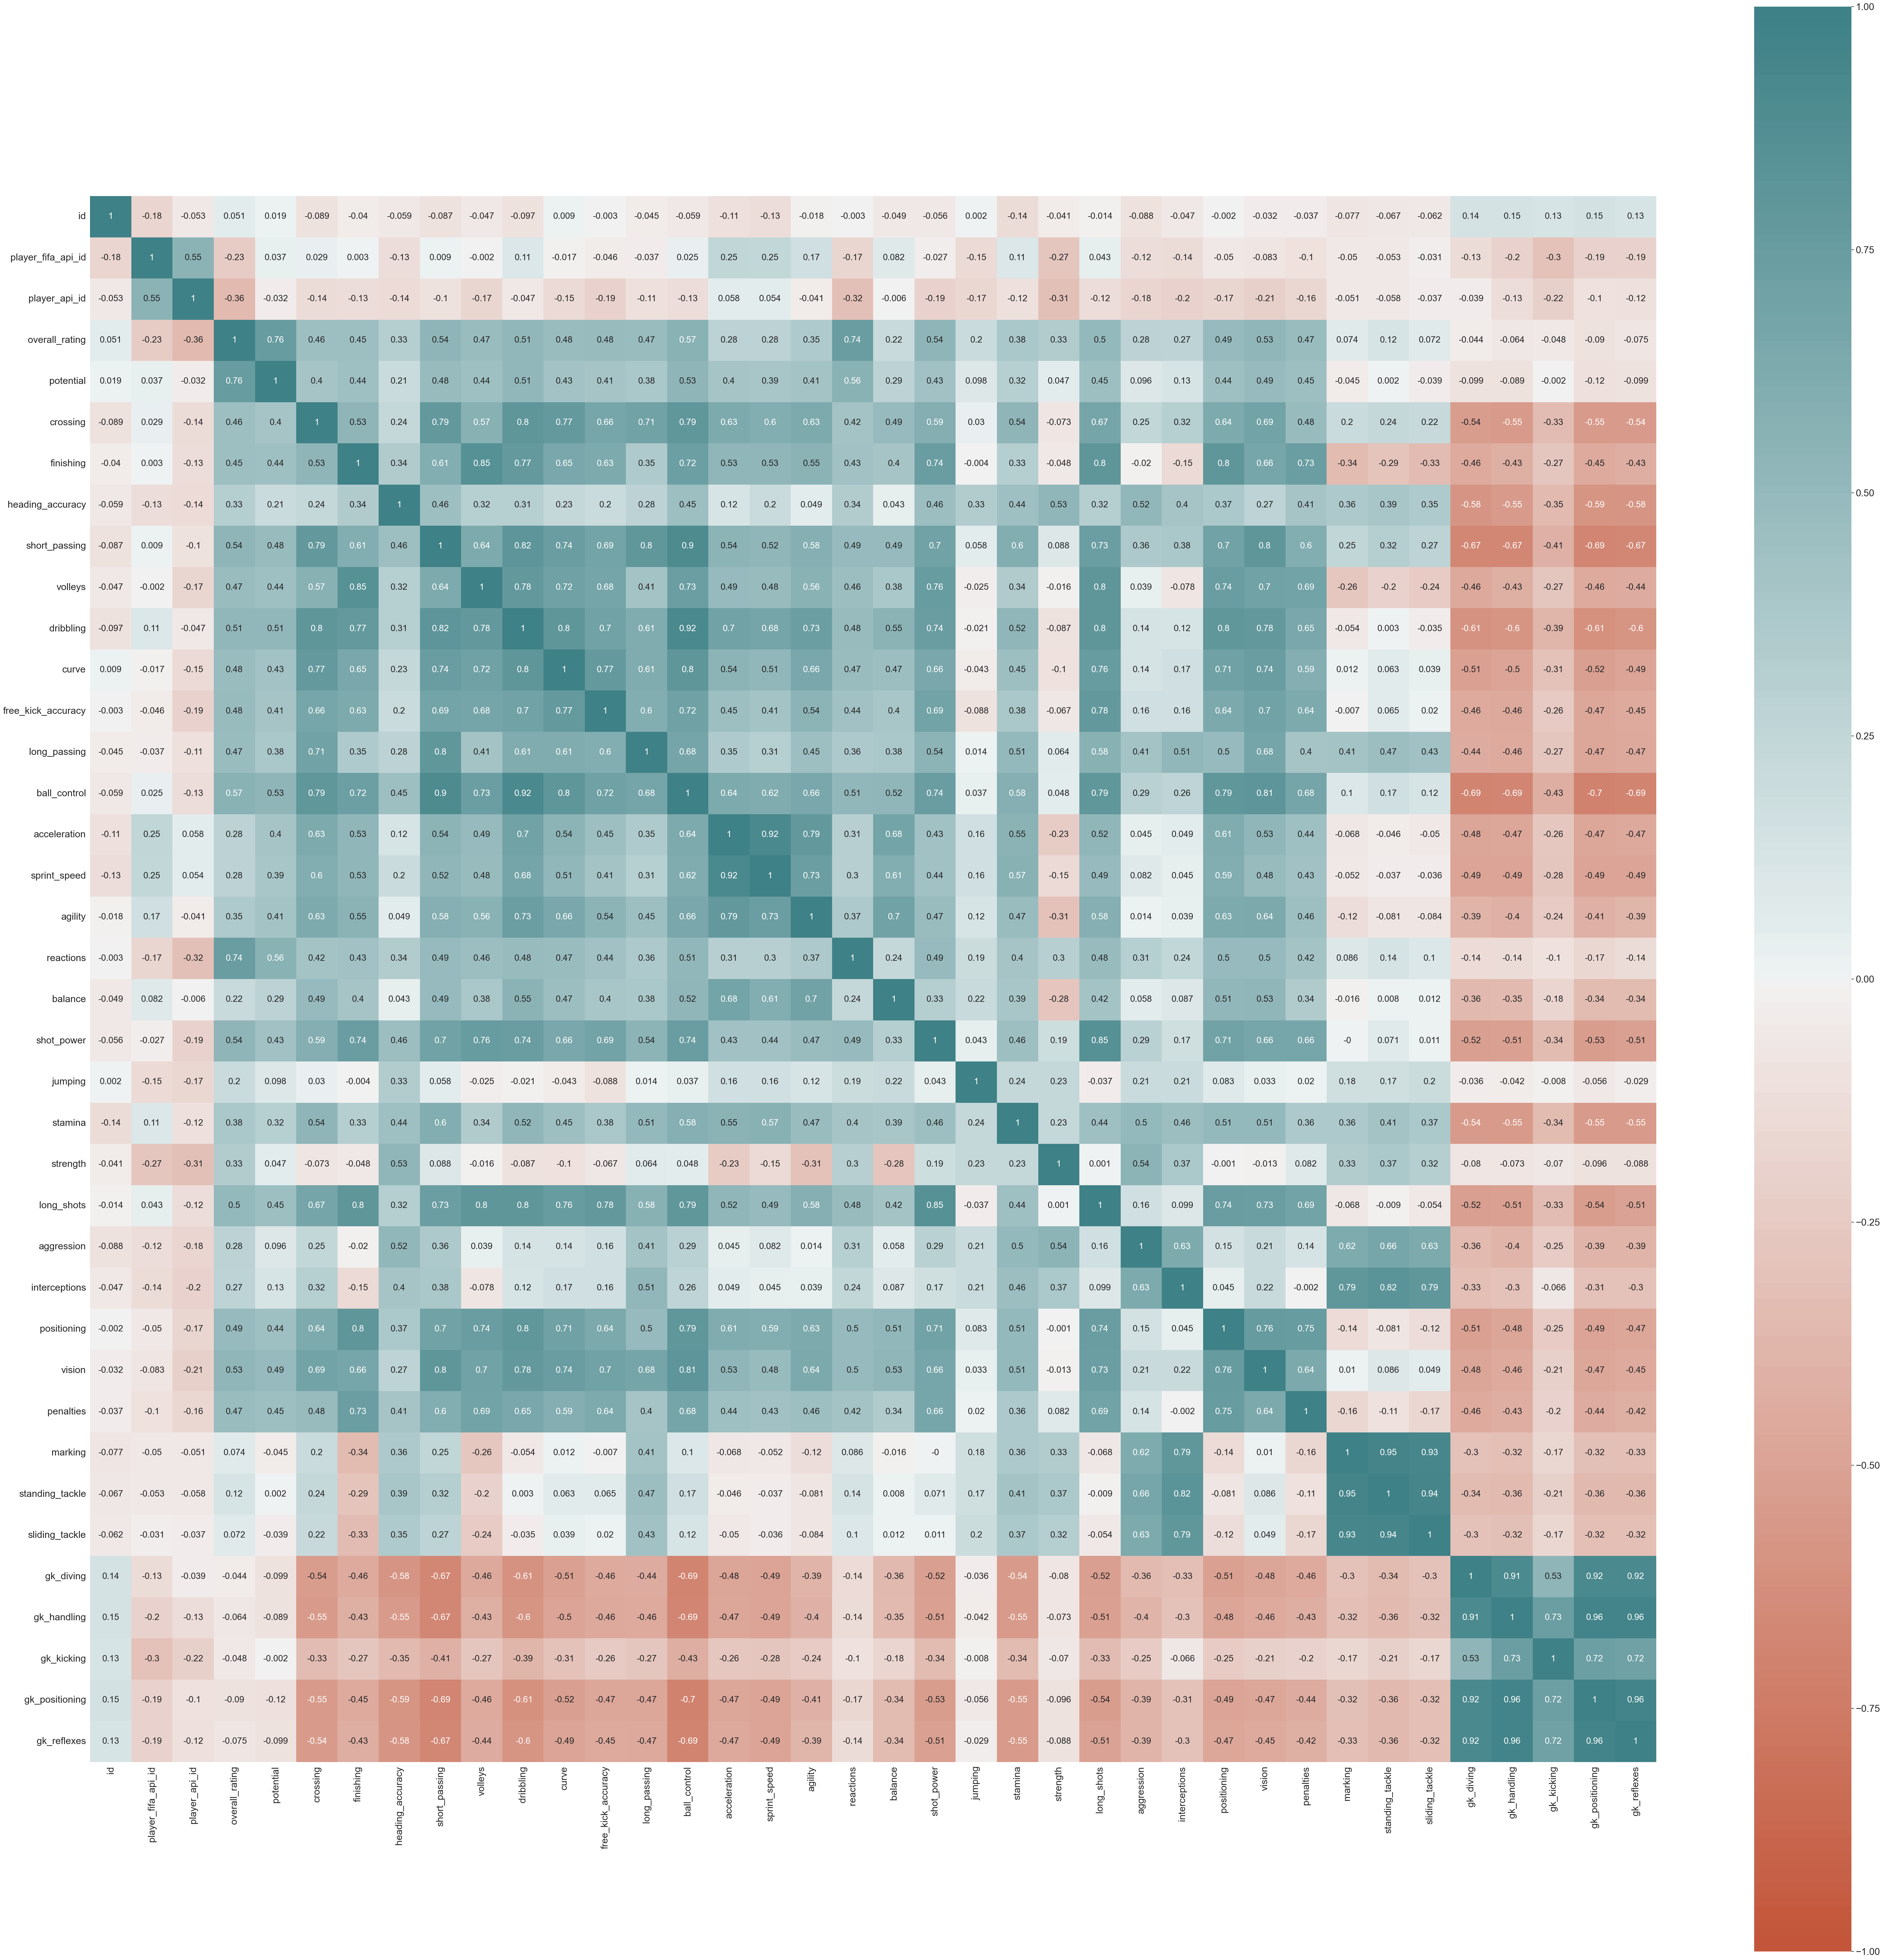

In [8]:
plt.figure(figsize = (80,80))

sns.set(font_scale=2.0)
ax = sns.heatmap(
    cormat,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 200, n=200),
    square=True,annot=True, annot_kws={'size': 20})


Please place here your interpretation and remarks for the above correlation plot

### Now it's time to select or features and distinquish the indepedent variables and the depedent variable (overall rating)

Creating X and y for a regression model involves preparing the input features (X) and the target variable (y) for training the model

In [9]:
list(data)

['id',
 'player_fifa_api_id',
 'player_api_id',
 'date',
 'overall_rating',
 'potential',
 'preferred_foot',
 'attacking_work_rate',
 'defensive_work_rate',
 'crossing',
 'finishing',
 'heading_accuracy',
 'short_passing',
 'volleys',
 'dribbling',
 'curve',
 'free_kick_accuracy',
 'long_passing',
 'ball_control',
 'acceleration',
 'sprint_speed',
 'agility',
 'reactions',
 'balance',
 'shot_power',
 'jumping',
 'stamina',
 'strength',
 'long_shots',
 'aggression',
 'interceptions',
 'positioning',
 'vision',
 'penalties',
 'marking',
 'standing_tackle',
 'sliding_tackle',
 'gk_diving',
 'gk_handling',
 'gk_kicking',
 'gk_positioning',
 'gk_reflexes']

In [10]:
# Drop all variables that contain ids, the date and the overall rating (as this is your depedent variable)
# To implement this step create a list 'features' that contains all the respective names of the variables except of the ones contain the id.
# Use the 'list' command to create this list and then use data[features] to obtain the remained values for the dataset

data.drop(['id','player_fifa_api_id','player_api_id'],axis =1, inplace = True) 

features = list(data)
# Place your code
data[features].head()

,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,2/18/2016 0:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,11/19/2015 0:00,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,9/21/2015 0:00,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,3/20/2015 0:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,2/22/2007 0:00,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [11]:
#Identify and print the categorical and numerical attributes
catvars  = data.dtypes[data.dtypes == 'object'].index.to_list()
numvars = data.dtypes[data.dtypes != 'object'].index.to_list()

print(catvars)
print(numvars)

['date', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate']
['overall_rating', 'potential', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']


In [12]:
# List the categotical attributes and remove them from the features created before
remove = catvars
# Place your code
data.drop(remove, axis=1, inplace=True)

In [13]:
data

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.000000,71.000000,49.000,44.000000,71.000000,61.000000,44.000000,51.000000,45.000000,39.000000,...,54.000000,48.000000,65.000000,69.000000,69.000000,6.000000,11.000000,10.000000,8.00000,8.000000
1,67.000000,71.000000,49.000,44.000000,71.000000,61.000000,44.000000,51.000000,45.000000,39.000000,...,54.000000,48.000000,65.000000,69.000000,69.000000,6.000000,11.000000,10.000000,8.00000,8.000000
2,62.000000,66.000000,49.000,44.000000,71.000000,61.000000,44.000000,51.000000,45.000000,39.000000,...,54.000000,48.000000,65.000000,66.000000,69.000000,6.000000,11.000000,10.000000,8.00000,8.000000
3,61.000000,65.000000,48.000,43.000000,70.000000,60.000000,43.000000,50.000000,44.000000,38.000000,...,53.000000,47.000000,62.000000,63.000000,66.000000,5.000000,10.000000,9.000000,7.00000,7.000000
4,61.000000,65.000000,48.000,43.000000,70.000000,60.000000,43.000000,50.000000,44.000000,38.000000,...,53.000000,47.000000,62.000000,63.000000,66.000000,5.000000,10.000000,9.000000,7.00000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,62.000000,70.000000,17.000,9.000000,35.000000,35.000000,5.000000,1.000000,12.000000,7.000000,...,45.000000,26.000000,16.000000,15.000000,18.000000,63.000000,64.000000,42.000000,63.00000,63.000000
4996,59.000000,63.000000,17.000,9.000000,35.000000,35.000000,5.000000,1.000000,12.000000,7.000000,...,45.000000,26.000000,16.000000,15.000000,18.000000,63.000000,63.000000,38.000000,63.00000,38.000000
4997,59.000000,63.000000,17.000,9.000000,35.000000,35.000000,5.000000,1.000000,12.000000,60.000000,...,45.000000,26.000000,16.000000,15.000000,18.000000,63.000000,63.000000,38.000000,63.00000,38.000000
4998,67.809304,73.160016,54.923,51.372769,56.840586,62.106276,50.179331,60.344295,53.862006,50.004211,...,57.845593,55.410868,45.081412,48.585723,45.934954,13.436535,15.109084,18.998797,15.18087,15.258472


In [14]:
# Specifiy the X from the data[features]
X = data.drop('overall_rating', axis=1, inplace=False)
X

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,71.000000,49.000,44.000000,71.000000,61.000000,44.000000,51.000000,45.000000,39.000000,64.000000,...,54.000000,48.000000,65.000000,69.000000,69.000000,6.000000,11.000000,10.000000,8.00000,8.000000
1,71.000000,49.000,44.000000,71.000000,61.000000,44.000000,51.000000,45.000000,39.000000,64.000000,...,54.000000,48.000000,65.000000,69.000000,69.000000,6.000000,11.000000,10.000000,8.00000,8.000000
2,66.000000,49.000,44.000000,71.000000,61.000000,44.000000,51.000000,45.000000,39.000000,64.000000,...,54.000000,48.000000,65.000000,66.000000,69.000000,6.000000,11.000000,10.000000,8.00000,8.000000
3,65.000000,48.000,43.000000,70.000000,60.000000,43.000000,50.000000,44.000000,38.000000,63.000000,...,53.000000,47.000000,62.000000,63.000000,66.000000,5.000000,10.000000,9.000000,7.00000,7.000000
4,65.000000,48.000,43.000000,70.000000,60.000000,43.000000,50.000000,44.000000,38.000000,63.000000,...,53.000000,47.000000,62.000000,63.000000,66.000000,5.000000,10.000000,9.000000,7.00000,7.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,70.000000,17.000,9.000000,35.000000,35.000000,5.000000,1.000000,12.000000,7.000000,17.000000,...,45.000000,26.000000,16.000000,15.000000,18.000000,63.000000,64.000000,42.000000,63.00000,63.000000
4996,63.000000,17.000,9.000000,35.000000,35.000000,5.000000,1.000000,12.000000,7.000000,38.000000,...,45.000000,26.000000,16.000000,15.000000,18.000000,63.000000,63.000000,38.000000,63.00000,38.000000
4997,63.000000,17.000,9.000000,35.000000,35.000000,5.000000,1.000000,12.000000,60.000000,38.000000,...,45.000000,26.000000,16.000000,15.000000,18.000000,63.000000,63.000000,38.000000,63.00000,38.000000
4998,73.160016,54.923,51.372769,56.840586,62.106276,50.179331,60.344295,53.862006,50.004211,56.361339,...,57.845593,55.410868,45.081412,48.585723,45.934954,13.436535,15.109084,18.998797,15.18087,15.258472


In [15]:
# Specifiy also the target variable (y)
target = 'overall_rating'
y = data[target]
y

0       67.000000
1       67.000000
2       62.000000
3       61.000000
4       61.000000
          ...    
4995    62.000000
4996    59.000000
4997    59.000000
4998    67.809304
4999    77.000000
Name: overall_rating, Length: 5000, dtype: float64

### Task 2: Model Preparation & Evaluation

Per your company's request, you must fit two regression models viz. `LinearRegression` and `KNeighborsRegressor` (default hyperparameters). It is required that you fit the models using 5-fold cross-validation and return the mean train and validation scores for each estimator. We will use `sklearn` library to perform Linear and KNN Regression. Furthermore, for cross-validation, you are required to make use of the class cross_validate from the [https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html] from the `model_selection` library provided by sklearn. Create a list of models which consists of the respective models. Use `cross_validate` for each model in the list and finally return three lists/arrays `train_scores`, `val_scores` and `test_scores` comprising a list of 5 elements for each cross-validation on each of the `m` models. Store the mean test, val and train scores for linear regression and KNN in variables `linear_mean_train_scores`, `linear_val_train_scores`, `linear_mean_test_scores`, `knn_mean_train_scores`, `knn_mean_val_scores`, `knn_mean_test_scores`.

Let us split our data into training, validation and test set (60%, 20%, 20%)

In [37]:
from sklearn.model_selection import train_test_split

# Split data into training and temporary data (to be further split into validation and test sets)
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [38]:
# Split temporary data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size = 0.25 , random_state=42) # 0.25 x 0.8 = 0.2

In [39]:
# Place your code here

linear = LinearRegression()
knn = KNeighborsRegressor()

models = [linear, knn]

# Concatenate training and validation sets to perform cross_validation
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

xvals = [cross_validate(m, X_train_val, y_train_val, return_train_score= True, n_jobs=-1, cv = 5) for m in models]
print(xvals)

test_scores = [x['test_score'] for x in xvals]
train_scores = [x['train_score'] for x in xvals]

linear_mean_train_scores = np.mean(train_scores[0])
linear_mean_test_scores = np.mean(test_scores[0])
knn_mean_train_scores = np.mean(train_scores[1])
knn_mean_test_scores = np.mean(test_scores[1])


if linear_mean_train_scores > knn_mean_train_scores:
    print('LinearRegression fits well than KNeighborsRegression')
else:
     print('KNeighborsRegression  fits well than LinearRegression ')

if linear_mean_test_scores > knn_mean_test_scores:
    print('LinearRegression generlaizes well than KNeighborsRegression')
else:
     print('KNeighborsRegression  generlaizes well than LinearRegression ') 

[{'fit_time': array([0.00458407, 0.00339198, 0.00359178, 0.00486612, 0.00373936]), 'score_time': array([0.00083995, 0.00087237, 0.00145411, 0.00152278, 0.00084186]), 'test_score': array([0.85007686, 0.83298807, 0.82282733, 0.85910873, 0.84890498]), 'train_score': array([0.84547875, 0.85005323, 0.85204681, 0.84330044, 0.84625138])}, {'fit_time': array([0.00139999, 0.00474191, 0.00428319, 0.00388384, 0.00492096]), 'score_time': array([0.01838207, 0.03140593, 0.02799487, 0.02948022, 0.03576303]), 'test_score': array([0.93299181, 0.9306177 , 0.91332187, 0.92985488, 0.92033948]), 'train_score': array([0.95790296, 0.95727824, 0.95932376, 0.95632611, 0.95942761])}]
KNeighborsRegression  fits well than LinearRegression 
KNeighborsRegression  generlaizes well than LinearRegression 


<b>Visualising the performance</b>

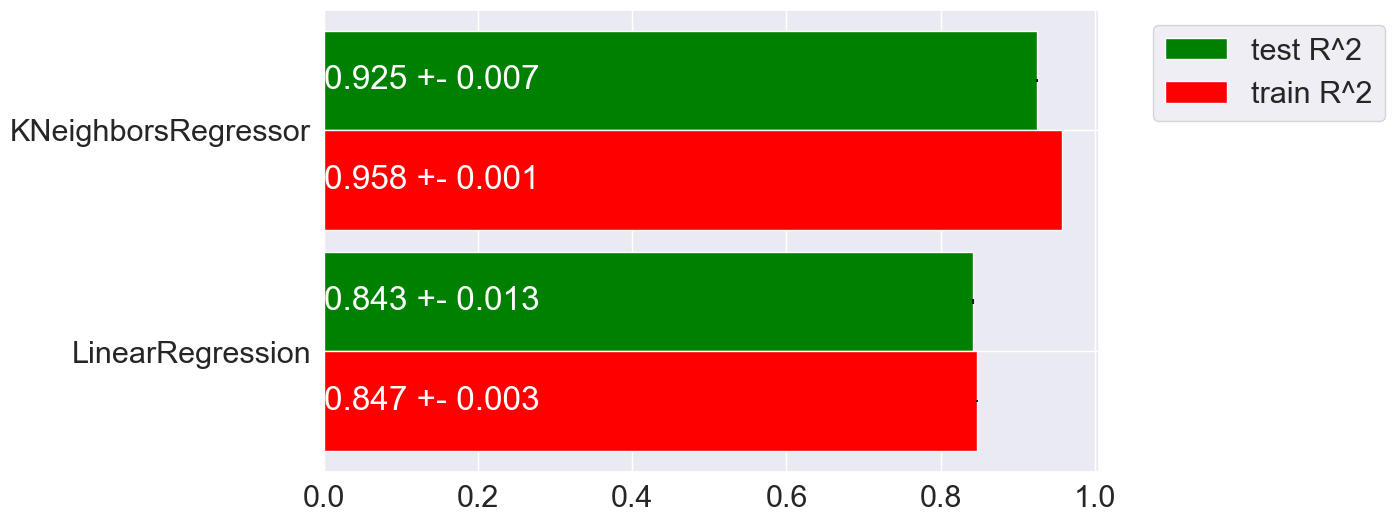

In [40]:
# Place your code here
fig, ax = plt.subplots(figsize=(10,6))
width=0.45

# Place your code here
ax.barh(np.arange(len(train_scores)), np.mean(test_scores, axis=1), width,
        yerr= np.std(test_scores, axis=1), color='green', label='test R^2')
ax.barh(np.arange(len(train_scores))-width, np.mean(train_scores, axis=1), width,
        yerr= np.std(train_scores, axis=1), color='red', label='train R^2')
for i, te, tr in zip(np.arange(len(train_scores)),test_scores,train_scores):
    ax.text(0, i, "{:.3f} +- {:.3f}".format(np.mean(te),np.std(te)), color=('white' if np.mean(te)>0.1 else 'black'), va='center')
    ax.text(0, i-width, "{:.3f} +- {:.3f}".format(np.mean(tr),np.std(tr)), color=('white' if np.mean(tr)>0.1 else 'black'), va='center')
labels = [c.__class__.__name__ if not hasattr(c, 'steps') else c.steps[0][0] + "_" + c.steps[1][0] for c in models]
ax.set(yticks=np.arange(len(train_scores))-width/2, yticklabels=labels)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)

plt.show()

#### Model Evaluation

Now, train the best performing on X_train, y_train to see how the model performs on the test data X_test and y_test. Evaluate the performance of your model on test data with respect to 3 metrics, mean absolute error, mean squared error and r2. Use the `sklearn.metrics` library for the evaluation. Interpret your analysis and results.

In [41]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
# Place your code here

knn.fit(X_train_val, y_train_val)
y_pred_knn = knn.predict(X_test)

knn_r2 = r2_score(y_test, y_pred_knn)
knn_mae = mean_absolute_error(y_test, y_pred_knn)
knn_mse = mean_squared_error(y_test, y_pred_knn)

print("Training set Mean Squared Error:", knn_mse)
print("Training set Mean Absolute Error:", knn_mae)
print("Training set R2:", knn_r2)

Training set Mean Squared Error: 3.4204333247128313
Training set Mean Absolute Error: 1.234685582514538
Training set R2: 0.9359126152663194


### Regularization

As indicated in the previous lectures and Lab sessions, <b>Regularization</b> is a technique applied during the training process of machine learning models to prevent overfitting. The core idea involves introducing a penalty on the magnitude of the coefficients associated with each feature, thereby constraining the complexity of the model. By penalizing large weights, regularization techniques ensure that the model does not rely too heavily on any single feature, promoting a more generalized model performance.

The two most prevalent forms of regularization are L1 (Lasso Regression) and L2 (Ridge Regression) regularization, differentiated by the nature of the penalty applied to the weights of the model.

In [42]:
# Place your code here for applying the Lasso and Ridge Regression techniques

from sklearn.linear_model import Ridge, Lasso

models = [Ridge(), Lasso()]

for model in models:
    model.fit(X_train_val, y_train_val)
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    mae = mean_absolute_error(y_test, pred)
    mse = mean_squared_error(y_test, pred)
    print(model.__class__.__name__, )
    print(f'r2 = {round(r2,3)}, mae = {round(mae,3)}, mse = {round(mse,3)}')


Ridge
r2 = 0.865, mae = 2.043, mse = 7.187
Lasso
r2 = 0.86, mae = 2.075, mse = 7.481


# 4th Lab (Decision Trees)

Now it is time to also evaluate and compare the utilization of a <b>Decision Tree</b> model to follow the previous lecture

### Decision Trees (Quick Recap)
​
1. Representation: Tree that splits data points into leaves based on tests
2. Evaluation (loss): Heuristic for purity of leaves (Gini index, entropy,...)
3. Optimization: Recursive, heuristic greedy search (Hunt's algorithm)
4. Consider all splits (thresholds) between adjacent data points, for every feature
5. Choose the one that yields the purest leafs, repeat
<img src="https://www.mastersindatascience.org/wp-content/uploads/sites/54/2022/05/tree-graphic.jpg" width="500" height="auto">
​
​
So, we can use Decision Trees for classification as well as regression tasks. How does the loss for a Decision Tree look like for classification and regression tasks? Let us have a look:
​
**Loss function for classification** :
- For a given Decision Tree, the leaves predict the class probability $\hat{p}_{c} = $ relative to the frequency of samples belonging to the class c.
- To assess the impurity of the leaves or for obtaining the splitting criterion (root feature) we can assess:
- Gini Index for the $l^{th}$ leaf: $Gini(X_{l}) = \sum_{\hat{p}_{c} \neq \hat{p}_{c'}}$
- Entropy for the $l^{th}$ leaf : $E(X_{l}) = \sum_{c \neq c'}\hat{p}_{c}log_{2}(\hat{p}_{c})$

Best split maximises the information gain. For the $i^{th}$ feature in the dataset we compute:
           $$Gain(X, X_{i}) = E(X) - \sum_{l=1}^{L}\frac{|X_{i=l}|}{|X|}E(X_{i=l})$$
- Entropy $E(X)$ is a measure of disorder, uncertainty, or impurity in the dataset and is calculated before the split. It quantifies the amount of information required to describe the uncertainty or the randomness of the system. The entropy of the entire dataset provides a baseline measure of impurity before it is divided. For a binary classification problem, the entropy can range from 0 (when all samples belong to a single class and the dataset is completely pure) to 1 (when the dataset is evenly split between two classes, indicating maximum uncertainty or disorder).
- **$\sum_{l=1}^{L}\frac{|X_{i=l}|}{|X|}E(X_{i=l})$** is the weighted sum of the entropy for each subset created by the split. Each term in the summation represents the entropy of a subset $E(X_{i=l})$, weighted by the proportion of the total number of instances that fall into that subset $\frac{|X_{i=l}|}{|X|}$, where $|X_{i=l}|$ is the number of instances in the $l^{th}$ subset after the split, and $|X|$ is the total number of instances before the split. This weighted sum represents the expected entropy after the split and accounts for the size of each subset; larger subsets have a greater impact on the overall entropy after the split.

### Task 1: Implement the Decision Tree

Now, create and train a `DecisionTreeRegressor` on X_train, y_train to see then how the model performs on the validation and test data X_test and y_test. Evaluate the performance of your model on test data with respect to 3 metrics, mean absolute error, mean squared error and r2. Use the `sklearn.metrics` library for the evaluation. Interpret your analysis and results.

In [43]:
# Create a Decision Tree Regressor setting random_state=42 for a random initialization
from sklearn.tree import DecisionTreeRegressor
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [44]:
# Evaluate the model on the training set
train_predictions = decision_tree_model.predict(X_train)
train_mae = mean_absolute_error(y_train, train_predictions)
train_mse = mean_squared_error(y_train, train_predictions)
train_r2 = r2_score(y_train, train_predictions)
print("Training set Mean Squared Error:", train_mse)
print("Training set Mean Absolute Error:", train_mae)
print("Training set R2:", train_r2)

# Evaluate the model on the validation set
val_predictions = decision_tree_model.predict(X_val)
val_mae = mean_absolute_error(y_val, val_predictions)
val_mse = mean_squared_error(y_val, val_predictions)
val_r2 = r2_score(y_val, val_predictions)
print("Validation set Mean Squared Error:", val_mse)
print("Validation set Mean Absolute Error:", val_mae)
print("Validation set R2:", val_r2)

# Evaluate the model on the test set
test_predictions = decision_tree_model.predict(X_test)
test_mae = mean_absolute_error(y_test, test_predictions)
test_mse = mean_squared_error(y_test, test_predictions)
test_r2 = r2_score(y_test, test_predictions)
print("Test set Mean Squared Error:", test_mse)
print("Test set Mean Absolute Error:", test_mae)
print("Test set R2:", test_r2)

#overfitting

Training set Mean Squared Error: 0.042899999999999994
Training set Mean Absolute Error: 0.016066666666666674
Training set R2: 0.9991762562788753
Validation set Mean Squared Error: 2.8005488888888888
Validation set Mean Absolute Error: 0.7637333333333334
Validation set R2: 0.9448009217220408
Test set Mean Squared Error: 2.796111111111111
Test set Mean Absolute Error: 0.8063333333333332
Test set R2: 0.9476103079568313


### Task 2: Designing the Hyperparameter Search Space and Preparing Grid Search (HPO)

We will now tune these algorithm's main regularization hyperparameter: the regularization hyperparameter $\alpha$ or (`alpha`) in Lasso and Ridge, the `max_depth` and the `min_samples_leaf` in the Decision Tree, and the number of neighbors (`n_neighbors`) in kNN.

We expect the optimum for the alpha parameters to lie in $[10^{-12},10^{12}]$ , for the max_depth between 30 and 50, the min_samples_leaf between 1 and 4, and for n_neighbors between 1 and 50. alpha should be varied on a log scale (i.e. [0.01, 0.1, 1, 10, 100]), max_depth and n_neighbors should be varied uniformly (i.e. [1,2,3,4])

* You can make use of numpy's [logspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.logspace.html), [geomspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.geomspace.html?highlight=geomspace#numpy.geomspace), and [linspace](https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html#numpy.linspace) functions.

For $\alpha$ parameter we will make use of `logspace` for the above-mentioned range. For `Decision Tree` and `KNN` we shall use the `geomspace`, which is a log scale with intervals spaced evenly in a gemoetric progeression.

The goal is to define the hyperparameter search space for tuning the models. This involves creating a dictionary object, named `param_a`, which maps the hyperparameter names to their respective search spaces. For both Lasso and Ridge regression models, the primary hyperparameter of interest is $\alpha$.

**Instructions**:

1. Begin by creating a dictionary named `param_a` (for lasso and ridge), `param_w` (for Decision Tree) and `param_n` (for KNN). This dictionary will contain entries where the keys are the names of the hyperparameters (for KNN use the key `kneighborsregressor__n_neighbors`) and the values are the ranges of values to be explored.

2. For the hyperparameter $\alpha$, use either logspace to generate the specified range of values. The choice between logspace and geomspace should be made based on the specific requirements (mentioned above) of the model and the nature of the hyperparameter:

3. For the hyperparameter `max_depth` and `n_neighbors`, use geomspace to generate the specified range of values.

    a. **Logspace**: Ideal for when the hyperparameter range spans several orders of magnitude and you want to ensure a multiplicative (exponential) distribution of values.

    b. **Geomspace**: Use this when you need a sequence of numbers spaced evenly on a log scale (similar to logspace), but with endpoints specified directly.

4. For each model (Lasso, Ridge, Decision Tree and KNN regression), assign the generated range of $\alpha$ , `max_depth` and the `min_samples_leaf` , and `n_neighbors` values to the corresponding key in respective dictionary object.

In [53]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.neighbors import KNeighborsRegressor    
from sklearn.tree import DecisionTreeRegressor

param_a = {'alpha' : np.logspace(-12, 12, num=22)}
param_d = {'max_depth' : np.geomspace(30, 50, num = 12, dtype =int),
          'min_samples_leaf' : np.geomspace(1,4, dtype = int)}
param_n = {'kneighborsregressor__n_neighbors' : np.geomspace(1,60, num=12, dtype=int)}

**Instructions**:
1. Create a list called `models` and populate the list with constructer calls of the models that need to be evaluated (Ridge and Lasso)

    a. For the `KNeighboursRegressor` kindly first make a pipeline with a [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
    
    
    - To do this import [make_pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html) from `sklearn.pipeline`.
        
    - Create a pipeline `make_pipeline(StandardScaler(), KNeighborsRegressor())` and store this pipeline object in `models` instead of just storing the `KNeighborsRegressor` constructer call.    
       
    
2. Create another list called `grid` and populate it with the hyperparameter dictionary objects `param_a` and `param_n`. Make sure that the length of `grids` and `models` is same. `grids` consists of the hyperparameter dictionaries associated with each model in `models`.

In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


models = [Ridge(), Lasso(), DecisionTreeRegressor(), make_pipeline(StandardScaler(), KNeighborsRegressor())]
grids = [param_a, param_a, param_d, param_n ]

### Task 3 : Hyperparameter Optimisation (HPO) using GridSearchCV

To accomplish the task of optimizing model hyperparameters while ensuring robust validation, you are instructed to implement the following procedure utilizing the [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) class from the scikit-learn library. This process not only aids in identifying the most effective hyperparameters for each model but also leverages $k$-fold cross-validation to validate the model's performance, thus ensuring a more reliable estimation of its generalizability.

At the end we will examine the best results from the different interations applied on the Decision Tree Regression model.

**Instructions**
1. **Initialize the `grid_searches` List:**
   - Your primary objective is to create a list named `grid_searches`. This list will store the results and configurations of the grid search process for each machine learning model you are optimizing. 

2. **Utilize `GridSearchCV` for Hyperparameter Optimization:**
   - For each model in your predefined `models` list, apply the `GridSearchCV` function to automate the search for the best hyperparameters. This function is designed to systematically explore a range of hyperparameter values, evaluating each combination's performance through cross-validation.

3. **Configure `GridSearchCV` Parameters:**
   - When calling `GridSearchCV`, ensure to pass the following parameters:
     - **estimator:** Each model from your `models` list.
     - **param_grid:** The corresponding hyperparameter grid for each model, stored in your `grids` list. This grid specifies the hyperparameters and their respective ranges of values to be tested.
     - **n_jobs=-1:** This argument instructs the process to use all available CPU cores for parallel computation, speeding up the grid search.
     - **cv=3:** Sets up 3-fold cross-validation. In this setup, the data is divided into three parts, where each part is used as a test set while the model is trained on the remaining two parts. This cycle is repeated three times, with each part serving as the test set once. This approach helps in assessing the model's performance more reliably by averaging the results across three different train-test splits.
     - **return_train_score=True:** By setting this parameter to True, the training scores alongside the validation scores are returned, allowing for a comprehensive evaluation of the model's performance over both the training and validation phases.

4. **Execute the Grid Search with Cross-Validation:**
   - The list comprehension iterates over pairs of models and their corresponding hyperparameter grids, executing the `fit` method on `GridSearchCV` objects with the dataset `(X, y)`. This fitting process conducts the grid search combined with 3-fold cross-validation for each model, optimizing hyperparameters while assessing performance across multiple data splits.

5. **Store the Results in `grid_searches`:**
   - The outcomes of the grid search and cross-validation for each model are stored in the `grid_searches` list. This collection will contain comprehensive details on the performance metrics, best scores, best parameters, and fitted models, providing a rich resource for subsequent analysis and model selection.

6. **Get the sorted keys (use the `sorted()` function)**
    -  From the `GridSearchCV` object of the Decision Tree in the `grid_searches`. Make use of the `.cv_results_.keys()` method (can be found in the documentation of GridSearchCV) to obtain all the keys.

7. **Create a variable `cv_results`** which stires the Grid Search results using the `.cv_results_` method from `GridSearchCV`

8. **Having done this, create a DataFrame `results_df`,** where the input data is a dictionary with keys obtained using the `.cv_results.keys()` method and the values for these key are extracted from the variable `cv_results`. 
(**Hint** : `df = pd.DataFrame({'mean_fit_time': cv_results['mean_fit_time']})...` )

9. **Display the `results_df` dataframe and present your analysis.**


In [47]:
from sklearn.model_selection import GridSearchCV

grid_searches = [GridSearchCV(m, grid, n_jobs=-1, cv=3, return_train_score = True).fit(X,y) for m,grid in zip(models,grids)]

/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.202e+04, tolerance: 1.815e+01
  model = cd_fast.enet_coordinate_descent(
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.217e+04, tolerance: 1.613e+01
  model = cd_fast.enet_coordinate_descent(
/Users/minjikim/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisati

In [73]:
grid_searches[0].best_score_
grid_searches[0].best_params_
grid_searches[0].best_estimator_
grid_searches[0].scorer_

In [74]:
grid_searches[0].cv_results_.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_alpha', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score', 0])

In [78]:
sorted(grid_searches[3].cv_results_.keys())

cv_results = grid_searches[3].cv_results_

results_df = pd.DataFrame({
    'mean_fit_time': cv_results['mean_fit_time'],
    'mean_score_time': cv_results['mean_score_time'],
    'mean_test_score': cv_results['mean_test_score'],
    'mean_train_score': cv_results['mean_train_score'],
    'std_test_score': cv_results['std_test_score'],
    'std_train_score': cv_results['std_train_score'],
    'rank_test_score': cv_results['rank_test_score']
})

# Apply the highlighting
results_df = results_df.sort_values(by = 'rank_test_score')
results_df

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,std_test_score,std_train_score,rank_test_score
9,0.005424,0.037948,0.826734,0.905113,0.020690,0.010565,1
10,0.004309,0.044987,0.826439,0.891445,0.018244,0.011864,2
8,0.004450,0.035206,0.822853,0.919006,0.019905,0.006969,3
11,0.003383,0.039853,0.820647,0.875412,0.022574,0.012903,4
7,0.005505,0.042026,0.818613,0.934364,0.020137,0.004621,5
6,0.002143,0.033562,0.809428,0.952634,0.021377,0.004433,6
5,0.005848,0.036549,0.802401,0.970279,0.023044,0.002379,7
4,0.005164,0.031462,0.795641,0.976735,0.024325,0.001728,8
2,0.004855,0.034927,0.770159,0.991352,0.028744,0.000642,9
3,0.004064,0.035467,0.770159,0.991352,0.028744,0.000642,9


In [56]:
##Helper  Function : to highlight text in a DataFrame##

def highlight_best_worst(s):
    """
    Highlight the max and min values in the DataFrame or Series.
    Assume s is a column named 'mean_test_score'.
    """
    is_max = s == s.max()
    is_min = s == s.min()
    return ['background-color: limegreen' if v else 'background-color: salmon' if is_min.iloc[i] else '' for i, v in enumerate(is_max)]


results_df_highlight = results_df.style.apply(highlight_best_worst, subset=['mean_test_score'])
results_df_highlight



,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,std_test_score,std_train_score,rank_test_score
9,0.005424,0.037948,0.826734,0.905113,0.020690,0.010565,1
10,0.004309,0.044987,0.826439,0.891445,0.018244,0.011864,2
8,0.004450,0.035206,0.822853,0.919006,0.019905,0.006969,3
11,0.003383,0.039853,0.820647,0.875412,0.022574,0.012903,4
7,0.005505,0.042026,0.818613,0.934364,0.020137,0.004621,5
6,0.002143,0.033562,0.809428,0.952634,0.021377,0.004433,6
5,0.005848,0.036549,0.802401,0.970279,0.023044,0.002379,7
4,0.005164,0.031462,0.795641,0.976735,0.024325,0.001728,8
2,0.004855,0.034927,0.770159,0.991352,0.028744,0.000642,9
3,0.004064,0.035467,0.770159,0.991352,0.028744,0.000642,9
